Problem : Given reading and writing score predict math score


In [77]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

Importing all Regression models from sklearn

In [78]:
import pandas as pd
df = pd.read_csv('./data/stud.csv')

In [80]:
df.dtypes

gender                         object
race_ethnicity                 object
parental_level_of_education    object
lunch                          object
test_preparation_course        object
math_score                      int64
reading_score                   int64
writing_score                   int64
dtype: object

Label Encoding vs One Hot Encoding

We can prefer one Hot Encoding on features like race ethnicity and parental level education data are nominal and have no definite relationship between them.

In [82]:
#target variable
target = df['math_score']
df.drop(['math_score'],axis=1,inplace=True)


In [85]:
num_features = df.select_dtypes(exclude="object").columns
cat_features = df.select_dtypes(include="object").columns

from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer

ohe = OneHotEncoder()
sc = StandardScaler()

preprocess_pipeline = ColumnTransformer(
  [('cat feature processing',ohe,cat_features),
   ('num feature processing',sc,num_features),
   
   ],remainder='passthrough'
)



In [86]:
X = preprocess_pipeline.fit_transform(df)
X

array([[ 1.        ,  0.        ,  0.        , ...,  1.        ,
         0.19399858,  0.39149181],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         1.42747598,  1.31326868],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.77010859,  1.64247471],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.12547206, -0.20107904],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.60515772,  0.58901542],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.15336989,  1.18158627]])

In [87]:
X.shape

(1000, 19)

We have successfully converted our dataframe into one hot type

In [99]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,target,test_size=0.2,random_state=20)

In [100]:
x_train.shape

(800, 19)

In [101]:
x_test.shape

(200, 19)

In [102]:
def evaluate_model(true,predicted):
  mae = mean_absolute_error(true,predicted)
  mse = mean_squared_error(true,predicted)
  r2 = r2_score(true,predicted)
  rmse = np.sqrt(mse)

  return mse,mae,r2,rmse

In [106]:
models = {
  "Linear Regression" : LinearRegression(),
  "Lasso" : Lasso(),
  "Ridge" : Ridge(),
  "KNeighborsRegressor" : KNeighborsRegressor(),
  "DecisionTree" : DecisionTreeRegressor(),
  "RandomForest" : RandomForestRegressor(),
  "XGBRegressor" : XGBRegressor(),
  "CatBoostRegressor" : CatBoostRegressor(verbose=False),
  "AdaBoostRegressor" : AdaBoostRegressor()
}



model_list_name = []
model_ = []
r2_list = []

for i in range(len(list(models))):
  model = list(models.values())[i]
  model.fit(x_train,y_train)

  y_train_pred = model.predict(x_train)
  y_test_pred = model.predict(x_test)

  train_mse,train_mae,train_r2,train_rmse = evaluate_model(y_train,y_train_pred)

  test_mse,test_mae,test_r2,test_rmse = evaluate_model(y_test,y_test_pred)

  print(list(models.keys())[i])
  model_list_name.append(list(models.keys())[i])
  model_.append(model)

  print('Model performance for Training set')
  print("- Root Mean Squared Error: {:.4f}".format(train_rmse))
  print("- Mean Absolute Error: {:.4f}".format(train_mae))
  print("- R2 Score: {:.4f}".format(train_r2))



  print('----------------------------------')

  print('Model performance for Test set')
  print("- Root Mean Squared Error: {:.4f}".format(test_rmse))
  print("- Mean Absolute Error: {:.4f}".format(test_mae))
  print("- R2 Score: {:.4f}".format(test_r2))
  r2_list.append(test_r2)
    
  print('='*35)
  print('\n')





Linear Regression
Model performance for Training set
- Root Mean Squared Error: 5.2834
- Mean Absolute Error: 4.2084
- R2 Score: 0.8793
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.5037
- Mean Absolute Error: 4.4045
- R2 Score: 0.8643


Lasso
Model performance for Training set
- Root Mean Squared Error: 6.4936
- Mean Absolute Error: 5.1109
- R2 Score: 0.8177
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 6.5424
- Mean Absolute Error: 5.2077
- R2 Score: 0.8082


Ridge
Model performance for Training set
- Root Mean Squared Error: 5.2763
- Mean Absolute Error: 4.2044
- R2 Score: 0.8796
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.5410
- Mean Absolute Error: 4.4382
- R2 Score: 0.8625


KNeighborsRegressor
Model performance for Training set
- Root Mean Squared Error: 5.7222
- Mean Absolute Error: 4.5157
- R2 Score: 0.8584
-------------------------

Result

In [107]:
result = pd.DataFrame(list(zip(model_list_name,r2_list,model_)),columns = ['Model','R2_Score','Model']).sort_values(by='R2_Score',ascending=False)
result

,Model,R2_Score,Model
0,Linear Regression,0.864299,LinearRegression()
2,Ridge,0.862454,Ridge()
7,CatBoostRegressor,0.827214,<catboost.core.CatBoostRegressor object at 0x0...
5,RandomForest,0.812091,"(DecisionTreeRegressor(max_features=1.0, rando..."
1,Lasso,0.808249,Lasso()
8,AdaBoostRegressor,0.801685,"(DecisionTreeRegressor(max_depth=3, random_sta..."
6,XGBRegressor,0.786528,"XGBRegressor(base_score=None, booster=None, ca..."
3,KNeighborsRegressor,0.773779,KNeighborsRegressor()
4,DecisionTree,0.680651,DecisionTreeRegressor()


Predictions

In [105]:
import seaborn as sn

In [109]:
lr = LinearRegression()
y_pred = model_[0].predict(x_test)

Text(0, 0.5, 'Y_Pred')

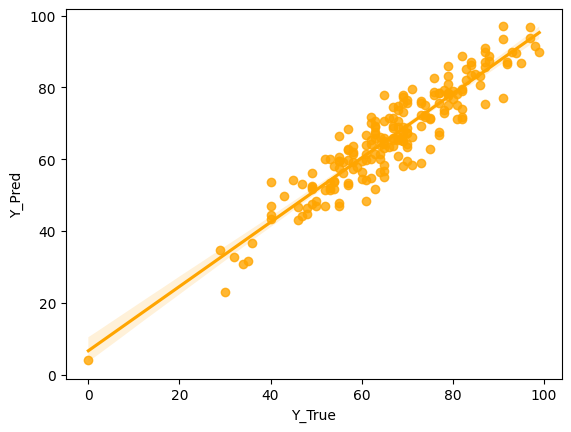

In [111]:
sn.regplot(x = y_test,y = y_pred,color='orange')
plt.xlabel('Y_True')
plt.ylabel('Y_Pred')

In [114]:
diff_df = pd.DataFrame(data = list(zip(y_test,y_pred,y_test-y_pred)),columns=['Y_Real','Y_Predicted','Difference'])
diff_df

,Y_Real,Y_Predicted,Difference
0,86,83.18750,2.81250
1,49,51.75000,-2.75000
2,69,67.21875,1.78125
3,73,69.25000,3.75000
4,52,51.37500,0.62500
...,...,...,...
195,62,71.68750,-9.68750
196,73,58.90625,14.09375
197,64,56.46875,7.53125
198,63,51.56250,11.43750


Linear Regression works well here!!

In [4]:
report = {'adaboost':[0.85,0.91,'Raja'],'dict_':[0.43,0.45,'Rahas']}

In [5]:
best_model = max(zip(list(report.values())[1],report.keys()))[1]

In [17]:
max_key = max(report, key=lambda k: report[k][1])

In [19]:
report[max_key]

[0.85, 0.91, 'Raja']